# SVM implementation in python

In [5]:
#Import Library
from sklearn import svm
from sklearn.datasets import load_iris

# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1, gamma=1)
# there is various option associated with it, like changing kernel, gamma and C value.

iris = load_iris()
# Train the model using the training sets and check score
model.fit(iris.data, iris.target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
model.score(iris.data, iris.target)

0.99333333333333329

In [10]:
#Predict Output
model.predict(iris.data[:1,:])

array([0])

Another example

In [8]:
from sklearn import svm
X = [[0,0],[1,1]]
y = [0,1]
svc = svm.SVC()
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
svc.predict([[2., 2.]])

array([1])

In [12]:
#get support vectors
svc.support_vectors_

array([[ 0.,  0.],
       [ 1.,  1.]])

In [26]:
#get indices of support vectors
svc.support_

array([  1,  13,  14,  15,  20,  25,  31,  36,  41,  45,  50,  51,  52,
        54,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  82,  83,  84,  85,
        86,  87,  88,  91,  92,  93,  95,  96,  97,  98,  99, 100, 101,
       103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 121, 123, 126, 127, 128, 131, 132, 133, 134, 136, 137,
       138, 140, 142, 145, 146, 147, 148, 149])

In [27]:
#get number of support vectors for each class
svc.n_support_

array([10, 40, 36])

SVM on IRIS dataset

In [15]:
from sklearn import svm
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)

In [17]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [20]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

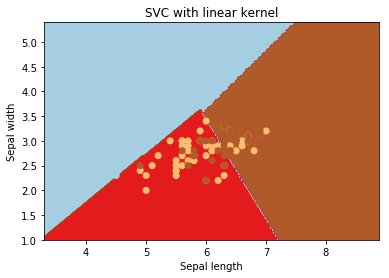

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

using rbf kernel

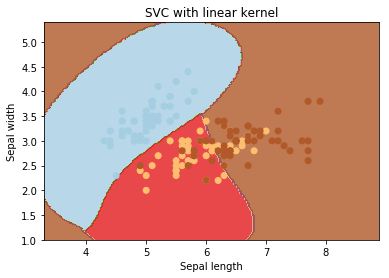

In [25]:
svc = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

Always go for linear kernel if you have large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

C: Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

Multi class classifcation using SVM

If n_class is the number of classes, then n_class * (n_class - 1) / 2 classifiers are constructed and each one trains data from two classes.

In [28]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape = "ovo")
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
dec = clf.decision_function([[1]])
dec.shape[1]

6L

In [30]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1]

4L

In [31]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [32]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4L

In [33]:
from sklearn import svm
X = [[0,0],[2,2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
clf.predict([[1, 1]])

array([ 1.5])

In [35]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [36]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [37]:
#Using python functions as kernels
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)
clf = svm.SVC(kernel=my_kernel)

In [38]:
#using the gram function
import numpy as np
from sklearn import svm
X = np.array([[0, 0], [1, 1]])
y = [0, 1]
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram = np.dot(X, X.T)
clf.fit(gram, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
clf.predict(gram)

array([0, 1])